In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdt
# matplotlib의 rc를 import하면서 폰트 한글 설정 가능
from matplotlib import rc
rc('font', family='Malgun Gothic')
%matplotlib inline
from scipy import stats as ss
import seaborn as sns

In [5]:
death = np.array([2, 1, 2, 4, 2, 5, 3, 3, 5, 6, 3, 8, 3,
                  3, 6, 3, 6, 5, 3, 5, 2, 6, 2, 3, 4, 3,
                  2, 9, 2, 2, 3, 2, 7, 3, 2, 10, 6, 2, 3,
                  1, 2, 3, 3, 4, 3, 2, 6, 2, 2, 3, 2, 3,
                  4, 3, 2, 3, 5, 2, 5, 5, 3, 4, 3, 6, 2,
                  1, 2, 3, 2, 6, 3, 3, 6, 3, 2, 3, 6, 4,
                  6, 5, 3, 5, 6, 2, 6, 3, 2, 3, 2, 6, 2,
                  6, 3, 3, 2, 6, 9, 6, 3, 6, 6, 2, 3, 2,
                  3, 5, 3, 5, 2, 3, 2, 3, 3, 1, 3, 3, 2,
                  3, 3, 4, 3, 6, 6, 3, 3, 3, 2, 3, 3, 6])
# pd.crosstab() 함수를 통해 도수분포로 배치
# 혹은 Series 생성 이후 value_counts() 메서드 활용
table = pd.crosstab(index=pd.Series(death), colnames=['질병'], columns='도수')
table.index = ["감염","각종암","순환기","호흡기","소화기",
               "사고사","비뇨기","정신병","노환","신경계"]
table

질병,도수
감염,4
각종암,33
순환기,48
호흡기,7
소화기,11
사고사,22
비뇨기,1
정신병,1
노환,2
신경계,1


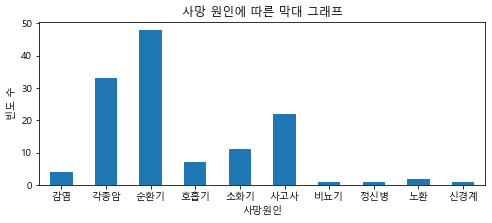

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
# legend=False 인자 전달하여 범례 제거 가능
# color 파라미터는 리스트로도 전달 가능
table.plot.bar(rot=0, legend=False, ax=ax)
ax.set_xlabel('사망원인')
ax.set_ylabel('빈도 수')
ax.set_title('사망 원인에 따른 막대 그래프')
# plt.rc() 함수 사용하여 글씨 크기들 조절 가능
plt.rc('font', size=8)

<AxesSubplot:ylabel='도수'>

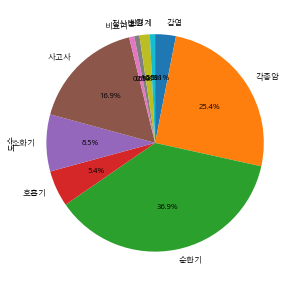

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
# pie 그래프를 바로 가져오려면 Series 형태여야 -> squeeze() 메서드 이용해 변경
# startangle, counterclock 파라미터 활용하여 시작점, 방향 변경
table.squeeze().plot.pie(startangle=90, counterclock=False, autopct='%.1f%%', ax=ax)

In [8]:
table2 = pd.DataFrame(death, columns=['질병코드'])
table2 = table2.replace(dict(zip(range(1, 11), ["감염", "각종암", "순환기", "호흡기", "소화기", "사고사", "비뇨기", "정신병", "노환", "신경계"])))
table_index2 = table2.value_counts(normalize=True).index[:3]
# 왜 MultiIndex로 나오지..?
table2.value_counts().index
#table2['질병코드'].isin(table_index2)

MultiIndex([('순환기',),
            ('각종암',),
            ('사고사',),
            ('소화기',),
            ('호흡기',),
            ( '감염',),
            ( '노환',),
            ('비뇨기',),
            ('신경계',),
            ('정신병',)],
           names=['질병코드'])

<AxesSubplot:>

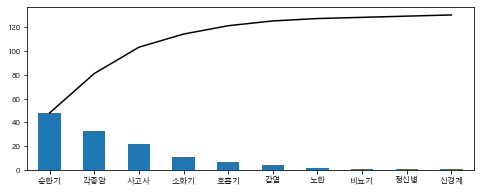

In [9]:
# pandas 및 matplotlib만 활용하여 파레토차트 그리기 -> 같은 ax에 바 그래프와 선 그래프 삽입
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
(table
.sort_values('도수', ascending=False)
.assign(누적도수=lambda df: df['도수'].cumsum())
['도수']
.plot.bar(ax=ax, rot=0)
)
(table
.sort_values('도수', ascending=False)
.assign(누적도수=lambda df: df['도수'].cumsum())
['누적도수']
.plot(ax=ax, color='black', rot=0)
)

<AxesSubplot:ylabel='Frequency'>

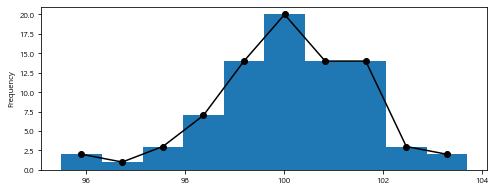

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
drink = np.array([101.8, 101.5, 101.8, 102.6, 101, 96.8, 102.4, 100, 98.8, 98.1,
                  98.8, 98, 99.4,95.5, 100.1, 100.5, 97.4, 100.2, 101.4, 98.7,
                  101.4, 99.4, 101.7, 99, 99.7, 98.9, 99.5, 100, 99.7, 100.9,
                  99.7, 99, 98.8, 99.7, 100.9, 99.9, 97.5, 101.5, 98.2, 99.2,
                  98.6, 101.4, 102.1, 102.9, 100.8, 99.4, 103.7, 100.3, 100.2, 101.1,
                  101.8, 100, 101.2, 100.5, 101.2, 101.6, 99.9, 100.5, 100.4, 98.1,
                  100.1, 101.6, 99.3, 96.1, 100, 99.7, 99.7, 99.4, 101.5, 100.9,
                  101.3, 99.9, 99.1, 100.7, 100.8, 100.8, 101.4, 100.3, 98.4, 97.2])
# pandas Series() 함수 이용하여 바로 히스토그램 생성 가능
pd.Series(drink).plot.hist(bins=10, ax=ax)
# pandas cut() 함수 이용하여 구간 설정 가능
drink_cut = (pd.DataFrame(drink, columns=['용량'])
.assign(구간=lambda df: pd.cut(df['용량'], bins=10))
['구간']
.value_counts(sort=False)
)
# cut() 함수를 value_counts() 메서드에 연결했을 때 인덱스는 pandas Interval 객체 -> mid 속성 이용하여 중앙값 반환 가능
drink_cut.index = [drink_cut.index[i].mid for i in range(len(drink_cut.index))]
drink_cut.plot(marker='o', color='black', ax=ax)

<AxesSubplot:>

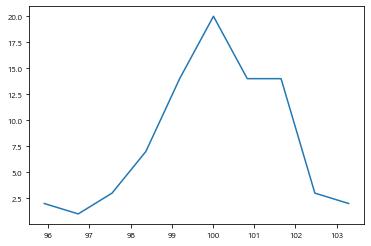

In [43]:
# pandas cut() 함수 이용하여 구간 설정 가능
drink_cut = (pd.DataFrame(drink, columns=['용량'])
.assign(구간=lambda df: pd.cut(df['용량'], bins=10))
['구간']
.value_counts(sort=False)
)
# cut() 함수를 value_counts() 메서드에 연결했을 때 인덱스는 pandas Interval 객체 -> mid 속성 이용하여 중앙값 반환 가능
drink_cut.index = [drink_cut.index[i].mid for i in range(len(drink_cut.index))]
drink_cut.plot()

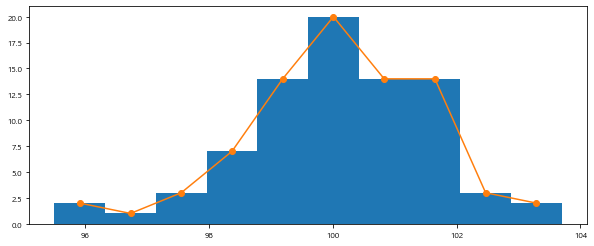

In [44]:
# pyplot의 hist() 함수로 출력했을 때 iterable 객체 생성 -> 언패킹 가능
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
n, bins, patches = plt.hist(drink)
x = [(bins[n] + bins[n-1]) / 2 for n in range(1, 11)]
plt.plot(x, n, marker='o')

In [49]:
# 평균과 중앙값, 백분위수(np.percentile())은 numpy 이용, 최빈값은 scipy.stats 이용
# cf) from scipy import stats == import scipy.stats
np.mean(drink), np.median(drink), ss.mode(drink), np.percentile(drink, 50)

(100.04125, 100.05, ModeResult(mode=array([99.7]), count=array([6])), 100.05)

In [50]:
# 표본의 분산과 표준편차를 구하는 경우 ddof 파라미터를 활용하여 1를 차감한 자유도 활용
np.var(drink, ddof=1), np.std(drink, ddof=1)

(2.316125000000001, 1.521882058505192)

In [52]:
height = np.array([181,161,170,160,158,168,162,179,183,178,171,177,163,158,160,160,158,
                   173,160,163,167,165,163,173,178,170,167,177,175,169,152,158,160,160,
                   159,180,169,162,178,173,173,171,171,170,160,167,168,166,164,173,180])
weight = np.array([78,49,52,53,50,57,53,54,71,73,55,73,51,53,65,48,59,
                   64,48,53,78,45,56,70,68,59,55,64,59,55,38,45,50,46,
                   50,63,71,52,74,52,61,65,68,57,47,48,58,59,55,74,74])
# numpy의 corrcoef() 함수 활용하여 상관계수 출력 -> numpy 2 * 2 array로 출력
np.corrcoef(height, weight)

array([[1.        , 0.73627651],
       [0.73627651, 1.        ]])

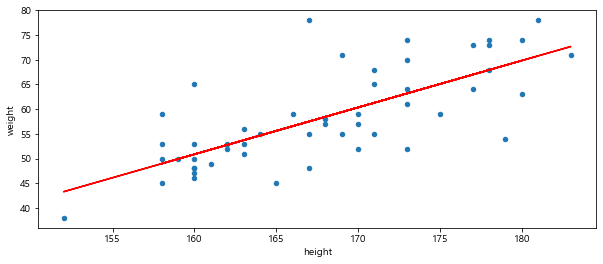

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
# numpy array를 그냥 더하면 벡터화 계산 수행 -> 리스트를 두 번 묶은 다음 array로 다시 합쳐줘야
# pandas DataFrame의 T 속성 이용하여 변경 가능
df_height_weight = (pd.DataFrame(np.array([list(height)] + [list(weight)])).T
.rename(columns={0:'height', 1:'weight'})
)
(df_height_weight
.plot.scatter(x='height', y='weight', ax=ax)
)
# numpy의 polyfit() 함수를 통해 회귀직선의 기울기 및 절편 확인 가능
b1, b0 = np.polyfit(height, weight, 1)
b1, b0
# 회귀직선을 ax단계에 추가 가능
ax.plot(height, b0 + b1*height, color='red')

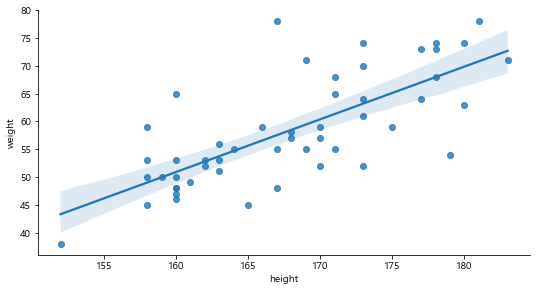

In [70]:
# seaborn의 lmplot() 함수 사용하여 회귀직선까지 표현 가능
grid = sns.lmplot(data=df_height_weight, x='height', y='weight')
# grid.fig.set_size_inches() 활용하여 fig 자체에서 진행될 경우 크기 조정 가능
grid.fig.set_size_inches(8, 4)